In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Adding starting values, tolerance, and objective function

In [2]:
Xa0 = 0
Xb0 = 6

tolerance = 0.01
tolerance_type = "x"  # can either be x or z

# A12 = 0.3
# A21 = 1

# def z(x):
#     return -np.exp((A12+2*(A21-A12)*x)*(1-x)**2)

# V = 4*10**6

# def z(x):
#     return 32*(10*x-25)/(x-5)**2 + 2.51*10**(-4)*x**2

# sigma = 1
# mu = 2

# def z(x):
#     return -1/(sigma*(2*np.pi)**0.5) * np.exp(-(x-mu)**2 / (2*sigma**2))

def z(x):
    v_in = 1.08*4*np.pi*x**2
    v_rxn = 1.28*4/3*np.pi*x**3
    return -(v_in-v_rxn) # maximizing = minimizing -z(x)

### Plot to find interval

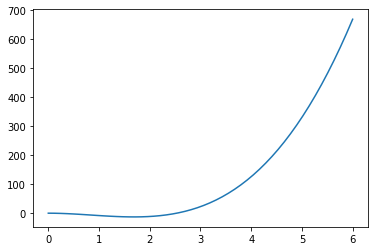

In [3]:
x = np.linspace(Xa0, Xb0, 50)
plt.plot(x, z(x))
plt.show()

### Solve the problem

In [4]:
diff = 1000
l = 0.618
d0 = Xb0 - Xa0

Xm0 = (1-l)*d0 + Xa0
Xn0 = l*d0 + Xa0

initial_X = [Xa0, Xm0, Xn0, Xb0]
df = pd.DataFrame(columns=['Step','a','m','n','b','Action'])

df.loc[len(df.index)] =  ["X0"] + initial_X + ["_"]
df.loc[len(df.index)] =  ["Z0"] + [z(x) for x in initial_X] + ["_"]

counter = 0

while diff > tolerance:
    Xa, Xm, Xn, Xb = df.iloc[-2,1:-1]
    Za, Zm, Zn, Zb = df.iloc[-1,1:-1]
    d = l*(Xb-Xa)

    if Zm >= Zn:
        x_values = [Xm, Xn, Xm+l*d , Xb]
        z_values = [Zm, Zn, z(Xm+l*d), Zb]
        df.loc[len(df.index)-1,"Action"]  = "L (m > n)"
    else:
        x_values = [Xa,Xa+(1-l)*d, Xm, Xn]
        z_values = [Za, Xa+(1-l)*d, Zm, Zn]
        df.loc[len(df.index)-1,"Action"]  = "R (n > m)"

    # Find all z values
    z_values = [z(x) for x in x_values]

    # Add new values to dataframe
    counter += 1
    df.loc[len(df.index)] = [f"X{counter}"] + x_values + ["_"]
    df.loc[len(df.index)] = [f"Z{counter}"] + z_values + ["_"]

    # if tolerance_type == "x":
    #     diff = abs(x_values[1] - x_values[2])
    # else:
    #     diff = abs(z_values[1] - z_values[2])

    if tolerance_type == "x":
        diff = abs(x_values[0] - x_values[3])
    else:
        diff = abs(z_values[0] - z_values[3])

    print(round(diff, str(tolerance)[::-1].find('.')+1))

df.iloc[-1,-1] = f"|m-n| < {tolerance_type} tol"

print("Tolerance Meet")
print('Tolerance: ',tolerance)
print("Difference:",diff)

df.iloc[:,1:-1] = df.iloc[:,1:-1].astype(float).round(str(tolerance)[::-1].find('.')+1)
df = df.set_index("Step")

3.708
2.292
1.417
0.876
0.541
0.334
0.207
0.128
0.079
0.049
0.03
0.019
0.012
0.007
Tolerance Meet
Tolerance:  0.01
Difference: 0.00711904679196218


In [5]:
df

,a,m,n,b,Action
Step,,,,,
X0,0.000,2.292,3.708,6.000,_
Z0,-0.000,-6.739,86.749,669.536,R (n > m)
X1,0.000,1.416,2.292,3.708,_
Z1,-0.000,-11.992,-6.739,86.749,R (n > m)
X2,0.000,0.875,1.416,2.292,_
Z2,-0.000,-6.803,-11.992,-6.739,L (m > n)
X3,0.875,1.416,1.751,2.292,_
Z3,-6.803,-11.992,-12.827,-6.739,L (m > n)
X4,1.416,1.751,1.958,2.292,_
